# 正規化項

## Ridge

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv")
# 欠損値対応
df.dropna(inplace=True)

In [18]:
# データ準備
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
# 標準化のために数値カラムのリストを作成
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
# ダミー変数作成は数値カラムのリスト作成の後
X = pd.get_dummies(X, drop_first=True)
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
# モデル学習
ridge = Ridge()
ridge.fit(X_train, y_train)
# 予測
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [19]:
# サラリーが予測値と比較して実際の値から平均どのくらいずれているか　 結果：251k
mean_absolute_error(y_test, y_pred)

251.01058042384872

In [20]:
ridge.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

In [21]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [22]:
# 線形回帰との比較
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

# さまざまなλでのRidge

In [23]:
# さまざまな特徴量からサラリーを予測するモデルを作成
alphas = np.logspace(-3, 3)
mse_list = []
coefs = []
for alpha in alphas:
    model = Ridge(alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # MSEで評価
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    # Ridgeの係数
    coefs.append(model.coef_)

Text(0, 0.5, 'test MSE')

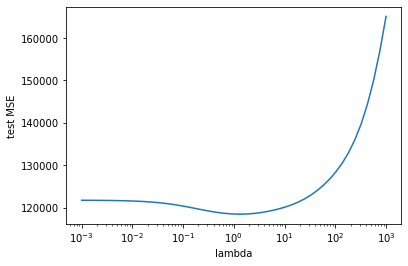

In [24]:
# λとMSEの比較
plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('test MSE')

Text(0, 0.5, 'standardized coefficients')

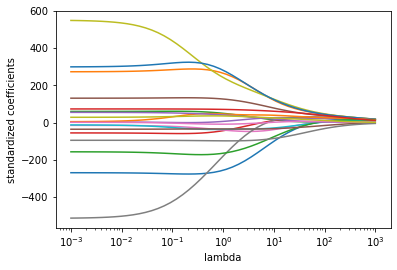

In [25]:
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('standardized coefficients')

## Lasso

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)

117768.90478161347
250.24481877112987


In [27]:
# 係数確認
lasso.coef_

array([-263.93470404,  267.52882597,   42.60344047,  -33.86419872,
          7.61638806,  125.23251733,  -29.82564501, -239.24447846,
        330.30504107,   -4.11414372,  259.64536978,    0.        ,
       -160.99905107,   71.08401856,   40.14808014,  -30.18012969,
          0.        ,  -93.87340542,   25.7211037 ])

# さまざまなλでのLasso

In [30]:
from sklearn.linear_model import Lasso
alphas = np.logspace(-3, 3)
mse_list = []
coefs = []
for alpha in alphas:
    model = Lasso(alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.495e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.991e+06, toleranc

Text(0, 0.5, 'test MSE')

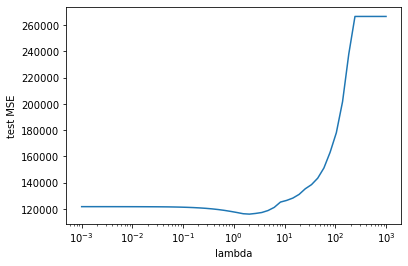

In [32]:
plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('test MSE')

Text(0, 0.5, 'standardized coefficients')

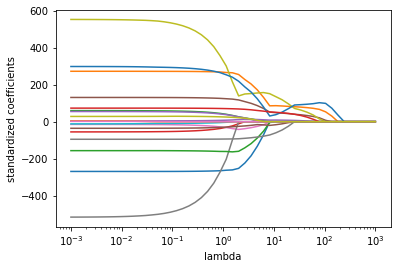

In [33]:
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('standardized coefficients')

In [34]:
np.argmin(mse_list)

27

In [35]:
np.min(mse_list)

116122.45120731373

In [36]:
lasso = Lasso(alphas[np.argmin(mse_list)])
lasso.fit(X_train, y_train)

Lasso(alpha=2.023589647725158)

In [37]:
pd.DataFrame({'coef': lasso.coef_, 'column_name': X_train.columns.to_list()})

,coef,column_name
0,-252.192228,AtBat
1,254.955174,Hits
2,26.344767,HmRun
3,-11.164490,Runs
4,11.554622,RBI
5,117.619609,Walks
6,-41.936832,Years
7,-0.000000,CAtBat
8,139.314907,CHits
9,-0.000000,CHmRun
